## 종합등급 컬럼 6단계

In [1]:
# prompt: 마운트

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [74]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import datetime
import nltk
import pandas as pd
import numpy as np
##import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#주가데이터 가져오기

#모델 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC

#모델저장 라이브러리
import pickle
import os

In [42]:
import pandas as pd
#df=pd.read_excel('/content/drive/MyDrive/kdt/team_por2/전처리및 모델링/전처리/Data수정_태완_0626.xlsx')
df=pd.read_excel('/content/drive/MyDrive/kdt/team_por2/전처리및 모델링/전처리/data수정0626.xlsx')

In [43]:
df_null = df[df['PER'].isna()]

# PER 컬럼의 값이 NaN이 아닌 데이터프레임
df2_not = df[~df['PER'].isna()]
df_null["PER"]=df_null['시가총액']/df_null['당기순이익']
#concat
df=pd.concat([df2_not,df_null])
df.reset_index(drop=True, inplace=True)

<ipython-input-43-19708205b3b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null["PER"]=df_null['시가총액']/df_null['당기순이익']


In [44]:
df_null = df[df['PBR'].isna()]

# PER 컬럼의 값이 NaN이 아닌 데이터프레임
df2_not = df[~df['PBR'].isna()]
df_null["PBR"]=df_null['시가총액']/df_null['자본총계']
#concat
df=pd.concat([df2_not,df_null])
df.reset_index(drop=True, inplace=True)

<ipython-input-44-6edbc5c9a101>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null["PBR"]=df_null['시가총액']/df_null['자본총계']


In [45]:
df_null = df[df['비지배주주순이익'].isna()]
# PER 컬럼의 값이 NaN이 아닌 데이터프레임
df2_not = df[~df['비지배주주순이익'].isna()]
df_null["비지배주주순이익"]=df_null['당기순이익']-df_null['지배주주순이익']
#concat
df=pd.concat([df2_not,df_null])
df.reset_index(drop=True, inplace=True)

<ipython-input-45-4efa5f16e4ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null["비지배주주순이익"]=df_null['당기순이익']-df_null['지배주주순이익']


In [46]:
# 2023 , 2019 년도 제거
df = df[(df['years'] != 2019) & (df['years'] != 2023)]

df = df.reset_index(drop=True)

In [47]:
columns_list = df.columns.tolist()

In [48]:
df.columns

Index(['Unnamed: 0', 'index', 'years', '회사명', 'stock_code', '종합등급', '매출액',
       '영업이익', '영업이익(발표기준)', '당기순이익', '지배주주순이익', '비지배주주순이익', '자산총계', '부채총계',
       '자본총계', '지배주주지분', '비지배주주지분', '자본금', '부채비율', '유보율', '영업이익률', '지배주주순이익률',
       'ROA', 'ROE', 'EPS(원)', 'BPS(원)', 'DPS(원)', 'PER', 'PBR', '발행주식수',
       '배당수익률', '지속가능경영 보고서공시여부', '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률',
       '영업이익률_상승률', '이사의 수', '사외이사 수', '사외이사 비율', '녹색 기업 지정', '총 임원 수',
       '여성 임원 수', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수',
       '남성 직원 수', '여성 직원 수', '직원 수', '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율',
       '여성 정규직 비율', '용수 사용량(Ton)', '에너지 총량(TJ)', '온실가스 배출총량(TonCo2eq)',
       'GICS_Sector', 'GICS_Industry', 'Unnamed: 0_y', '외국인 보유수량', '외국인 지분율',
       '용수 사용량 등급', '에너지 총량 등급', '온실가스 배출총량 등급', '시가총액', '상장주식수'],
      dtype='object')

In [49]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)

In [50]:
df.isnull().sum()

Unnamed: 0              0
index                   0
years                   0
회사명                     0
stock_code              0
종합등급                    0
매출액                     2
영업이익                    0
영업이익(발표기준)              0
당기순이익                   0
지배주주순이익                 0
비지배주주순이익                0
자산총계                    0
부채총계                    0
자본총계                    0
지배주주지분                  0
비지배주주지분                 0
자본금                     0
부채비율                    0
유보율                     0
영업이익률                   0
지배주주순이익률                2
ROA                     1
ROE                     1
EPS(원)                  0
BPS(원)                  1
DPS(원)                  0
PER                     0
PBR                     0
발행주식수                   0
배당수익률                   0
지속가능경영 보고서공시여부          0
매출액_상승률(퍼센트)            0
영업이익_상승률                0
배당수익률_상승률               0
영업이익률_상승률               0
이사의 수                  16
사외이사 수                 16
사외이사 비율     

In [51]:
selected_columns=columns_list
df = df[selected_columns]

In [52]:
#df에 연도컬럼 제거
df = df.drop(columns=['years','stock_code','용수 사용량(Ton)','에너지 총량(TJ)','온실가스 배출총량(TonCo2eq)', '비지배주주순이익', 'PER'])

In [53]:
df.isnull().sum()

Unnamed: 0         0
index              0
회사명                0
종합등급               0
매출액                2
영업이익               0
영업이익(발표기준)         0
당기순이익              0
지배주주순이익            0
자산총계               0
부채총계               0
자본총계               0
지배주주지분             0
비지배주주지분            0
자본금                0
부채비율               0
유보율                0
영업이익률              0
지배주주순이익률           2
ROA                1
ROE                1
EPS(원)             0
BPS(원)             1
DPS(원)             0
PBR                0
발행주식수              0
배당수익률              0
지속가능경영 보고서공시여부     0
매출액_상승률(퍼센트)       0
영업이익_상승률           0
배당수익률_상승률          0
영업이익률_상승률          0
이사의 수             16
사외이사 수            16
사외이사 비율           17
녹색 기업 지정           0
총 임원 수             7
여성 임원 수            7
여성 임원 비율           7
남성 평균 연봉          21
여성 평균 연봉          21
남성 정규직 수          21
여성 정규직 수          21
남성 직원 수           21
여성 직원 수           21
직원 수              21
여성 직원 비율          22
남성 직원 비율     

In [54]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

Unnamed: 0        0
index             0
회사명               0
종합등급              0
매출액               0
영업이익              0
영업이익(발표기준)        0
당기순이익             0
지배주주순이익           0
자산총계              0
부채총계              0
자본총계              0
지배주주지분            0
비지배주주지분           0
자본금               0
부채비율              0
유보율               0
영업이익률             0
지배주주순이익률          0
ROA               0
ROE               0
EPS(원)            0
BPS(원)            0
DPS(원)            0
PBR               0
발행주식수             0
배당수익률             0
지속가능경영 보고서공시여부    0
매출액_상승률(퍼센트)      0
영업이익_상승률          0
배당수익률_상승률         0
영업이익률_상승률         0
이사의 수             0
사외이사 수            0
사외이사 비율           0
녹색 기업 지정          0
총 임원 수            0
여성 임원 수           0
여성 임원 비율          0
남성 평균 연봉          0
여성 평균 연봉          0
남성 정규직 수          0
여성 정규직 수          0
남성 직원 수           0
여성 직원 수           0
직원 수              0
여성 직원 비율          0
남성 직원 비율          0
남성 정규직 비율         0
여성 정규직 비율         0


In [55]:
column_name = '영업이익률_상승률'
column_index = df.columns.get_loc(column_name)
column_index

31

In [56]:
#df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급'])
#df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급','사외이사 비율','여성 임원 비율','평균 남성 연봉','평균 여성 연봉','남성 정규직 비율','여성 정규직 비율'])
# df = df.dropna(subset =['매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급','지배주주순이익률','BPS(원)'])

In [57]:
# df.reset_index(drop=True, inplace=True)

In [58]:
signal_column = df.pop('GICS_Industry')
df.insert(0, 'GICS_Industry', signal_column)
signal_column = df.pop('녹색 기업 지정')
df.insert(0, '녹색 기업 지정', signal_column)
signal_column = df.pop('GICS_Sector')
df.insert(0, 'GICS_Sector', signal_column)
# signal_column = df.pop('비지배주주순이익')
# df.insert(35, '비지배주주순이익', signal_column)
signal_column = df.pop('자산총계')
df.insert(0, '자산총계', signal_column)
signal_column = df.pop('종합등급')
df.insert(0, '종합등급', signal_column)
signal_column = df.pop('index')
df.insert(0, 'index', signal_column)

In [59]:
df=pd.get_dummies(df, columns=['GICS_Sector'])
df=pd.get_dummies(df, columns=['GICS_Industry'])

In [60]:
'''
columns_to_move = [
    '비지배주주순이익', '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수', '여성 임원 비율',
    '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수',
    '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율'
]
'''
columns_to_move = [
    '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수 ', '여성 임원 비율',
    '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수',
    '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율'
]

# 나머지 컬럼 리스트
remaining_columns = [col for col in df.columns if col not in columns_to_move]

# 새로운 컬럼 순서로 데이터프레임 재정렬
new_column_order = remaining_columns + columns_to_move
df = df[new_column_order]

KeyError: "['여성 임원 수 '] not in index"

In [ ]:
# k means
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(0)

# 각 변수에 대해 K-means 클러스터링 모델 초기화 및 훈련
columns = ['사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율','사외이사 수']
for col in columns:
    kmeans = KMeans(n_clusters=5, random_state=0)
    X = df[[col]]
    kmeans.fit(X)
    df[f'{col}_cluster'] = kmeans.labels_

# 결과 확인
df.head()

In [ ]:
lst_features_ = ['사외이사 비율_cluster', '여성 임원 비율_cluster', '남성 평균 연봉_cluster', '여성 평균 연봉_cluster', '남성 정규직 비율_cluster', '여성 정규직 비율_cluster']
for i in lst_features_:
  for j in lst_features_[1:]:
    if i != j:

      df[f'{i}_{j}'] = df[i].astype(str) + "_" + df[j].astype(str)
      df=pd.get_dummies(df, columns=[f'{i}_{j}'])

In [ ]:
df = df.drop(columns=['사외이사 비율','여성 임원 비율','남성 평균 연봉','남성 정규직 수', '여성 정규직 수', '남성 정규직 비율','여성 정규직 비율','여성 평균 연봉','여성 직원 수','남성 직원 수','이사의 수','사외이사 수','여성 임원 수 '])

In [ ]:
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 수치형 컬럼 선택
numeric_cols = ['자산총계', '매출액', '영업이익', '영업이익(발표기준)', '당기순이익', '지배주주순이익','부채총계', '자본총계',
                '지배주주지분', '비지배주주지분', '자본금', '부채비율', '유보율', '영업이익률', '지배주주순이익률', 'ROA', 'ROE', 'EPS(원)',
                'BPS(원)', 'DPS(원)', 'PBR', '발행주식수', '배당수익률', '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률',
                '영업이익률_상승률', '외국인 보유수량', '총 임원 수', '직원 수']
non_numeric_cols = df.columns.difference(numeric_cols)
# 스케일링 적용
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

In [ ]:
df1 = df.copy()

In [ ]:
def convert_grade(grade):
    if grade in ['A+']:
        return 5
    if grade in ['A']:
        return 4
    if grade in ['B+']:
        return 3
    if grade in ['B']:
        return 2
    if grade in ['C','.C']:
        return 1
    if grade in ['D']:
        return 0

# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df1['종합등급'] = df1['종합등급'].apply(lambda x: convert_grade(x))

### ANOVA 분석

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# 수치형데이터 컬럼과 종합등급 컬럼이 들어간 새로운 df생성
df1_numeric = df1[numeric_cols]
df1_numeric['종합등급'] = df1['종합등급']

# 종합등급의 각 수준에 따른 수치형 변수들의 데이터 프레임 생성
grade_groups = {}
for grade in df1_numeric['종합등급'].unique():
    grade_groups[grade] = df1_numeric[df1_numeric['종합등급'] == grade]

# ANOVA 분석 수행 및 P-value 값이 0.05 이상인 컬럼 제거
anova_results = {}
drop_col = []
for col in numeric_cols:
    data = [grade_groups[grade][col] for grade in df1_numeric['종합등급'].unique()]
    f_statistic, p_value = f_oneway(*data)
    anova_results[col] = {'F-statistic': f_statistic, 'P-value': p_value}

    # P-value 값이 0.05 이상인 컬럼만 추출
    if p_value > 0.05:
        drop_col.append(col)

# 결과 출력
for col, result in anova_results.items():
    print(f"ANOVA results for '{col}':")
    print("F-statistic:", result['F-statistic'])
    print("P-value:", result['P-value'])
    print()

# df1_numeric에서 drop_col에 있는 컬럼들을 제외하고 가져오기
df1 = df1.drop(drop_col, axis=1)

# 결과 확인
print(df1.columns)

### 카이제곱 검정

In [61]:
# '종합등급' 컬럼과 카이제곱 검정
import pandas as pd
from scipy.stats import chi2_contingency

# 범주형 컬럼으로 df 생성
df1_non_numeric = df1[non_numeric_cols]

# index, 회사명_y 컬럼 제외
df1_non_numeric = df1_non_numeric.drop(columns=['index', '회사명'])


# '종합등급' 컬럼과 카이제곱 검정 수행
chi2_results = {}
for col in df1_non_numeric.columns:
    if col != '종합등급':
        contingency_table = pd.crosstab(df1_non_numeric[col], df['종합등급'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results[col] = {'Chi2-statistic': chi2, 'P-value': p_value}

# 결과 출력
for col, result in chi2_results.items():
    print(f"Chi-squared test results for '{col}' with '종합등급':")
    print("Chi2-statistic:", result['Chi2-statistic'])
    print("P-value:", result['P-value'])
    print()

# P-value 값이 0.05 이상인 컬럼만 추출
significant_columns = [col for col, result in chi2_results.items() if result['P-value'] > 0.05]

# 결과 출력
print("Significant columns:", significant_columns)

# df에서 significant_columns 컬럼들 제거
df1 = df1.drop(columns=significant_columns)

# df에서 회사명 컬럼 제거
df1 = df1.drop(columns=['회사명'])

KeyError: "['GICS_Industry_Advertising Agencies', 'GICS_Industry_Agricultural Inputs', 'GICS_Industry_Airlines', 'GICS_Industry_Airports & Air Services', 'GICS_Industry_Aluminum', 'GICS_Industry_Apparel Retail', 'GICS_Industry_Asset Management', 'GICS_Industry_Auto & Truck Dealerships', 'GICS_Industry_Beverages - Brewers', 'GICS_Industry_Beverages - Non-Alcoholic', 'GICS_Industry_Beverages - Wineries & Distilleries', 'GICS_Industry_Biotechnology', 'GICS_Industry_Broadcasting', 'GICS_Industry_Building Materials', 'GICS_Industry_Building Products & Equipment', 'GICS_Industry_Business Equipment & Supplies', 'GICS_Industry_Chemicals', 'GICS_Industry_Communication Equipment', 'GICS_Industry_Computer Hardware', 'GICS_Industry_Copper', 'GICS_Industry_Credit Services', 'GICS_Industry_Drug Manufacturers - General', 'GICS_Industry_Education & Training Services', 'GICS_Industry_Electrical Equipment & Parts', 'GICS_Industry_Electronics & Computer Distribution', 'GICS_Industry_Engineering & Construction', 'GICS_Industry_Entertainment', 'GICS_Industry_Farm & Heavy Construction Machinery', 'GICS_Industry_Farm Products', 'GICS_Industry_Food Distribution', 'GICS_Industry_Footwear & Accessories', 'GICS_Industry_Furnishings, Fixtures & Appliances', 'GICS_Industry_Household & Personal Products', 'GICS_Industry_Industrial Distribution', 'GICS_Industry_Insurance - Diversified', 'GICS_Industry_Integrated Freight & Logistics', 'GICS_Industry_Leisure', 'GICS_Industry_Lumber & Wood Production', 'GICS_Industry_Marine Shipping', 'GICS_Industry_Medical Devices', 'GICS_Industry_Medical Distribution', 'GICS_Industry_Medical Instruments & Supplies', 'GICS_Industry_Metal Fabrication', 'GICS_Industry_Packaged Foods', 'GICS_Industry_Paper & Paper Products', 'GICS_Industry_Pollution & Treatment Controls', 'GICS_Industry_Publishing', 'GICS_Industry_Railroads', 'GICS_Industry_Real Estate - Development', 'GICS_Industry_Real Estate - Diversified', 'GICS_Industry_Real Estate Services', 'GICS_Industry_Recreational Vehicles', 'GICS_Industry_Resorts & Casinos', 'GICS_Industry_Restaurants', 'GICS_Industry_Scientific & Technical Instruments', 'GICS_Industry_Security & Protection Services', 'GICS_Industry_Semiconductor Equipment & Materials', 'GICS_Industry_Semiconductors', 'GICS_Industry_Software - Application', 'GICS_Industry_Software - Infrastructure', 'GICS_Industry_Specialty Business Services', 'GICS_Industry_Specialty Industrial Machinery', 'GICS_Industry_Specialty Retail', 'GICS_Industry_Tools & Accessories', 'GICS_Industry_Utilities - Regulated Electric', 'GICS_Industry_Utilities - Regulated Gas', 'GICS_Sector_Basic Materials', 'GICS_Sector_Financial Services', 'GICS_Sector_Real Estate', 'Unnamed: 0_y', '남성 정규직 비율_cluster', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_0_0', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_0_2', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_0_3', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_1_3', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_1_4', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_2_0', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_2_2', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_3_2', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_3_3', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_4_0', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_4_2', '남성 정규직 비율_cluster_남성 평균 연봉_cluster_4_3', '남성 정규직 비율_cluster_여성 임원 비율_cluster_0_0', '남성 정규직 비율_cluster_여성 임원 비율_cluster_0_1', '남성 정규직 비율_cluster_여성 임원 비율_cluster_0_3', '남성 정규직 비율_cluster_여성 임원 비율_cluster_0_4', '남성 정규직 비율_cluster_여성 임원 비율_cluster_1_2', '남성 정규직 비율_cluster_여성 임원 비율_cluster_1_3', '남성 정규직 비율_cluster_여성 임원 비율_cluster_2_0', '남성 정규직 비율_cluster_여성 임원 비율_cluster_2_1', '남성 정규직 비율_cluster_여성 임원 비율_cluster_2_4', '남성 정규직 비율_cluster_여성 임원 비율_cluster_3_1', '남성 정규직 비율_cluster_여성 임원 비율_cluster_3_2', '남성 정규직 비율_cluster_여성 임원 비율_cluster_4_0', '남성 정규직 비율_cluster_여성 임원 비율_cluster_4_1', '남성 정규직 비율_cluster_여성 임원 비율_cluster_4_3', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_0_0', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_0_1', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_0_2', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_0_3', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_0_4', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_1_0', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_1_2', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_2_1', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_2_2', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_2_4', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_3_0', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_3_1', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_3_2', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_3_3', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_3_4', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_4_0', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_4_1', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_4_2', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_4_3', '남성 정규직 비율_cluster_여성 정규직 비율_cluster_4_4', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_0_0', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_0_2', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_0_4', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_1_3', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_2_0', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_2_2', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_3_3', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_3_4', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_4_0', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_4_2', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_4_3', '남성 정규직 비율_cluster_여성 평균 연봉_cluster_4_4', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_0_0', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_0_2', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_0_4', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_2_0', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_2_2', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_2_3', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_2_4', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_3_0', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_3_1', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_3_3', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_3_4', '남성 평균 연봉_cluster_남성 정규직 비율_cluster_4_1', '남성 평균 연봉_cluster_여성 임원 비율_cluster_0_1', '남성 평균 연봉_cluster_여성 임원 비율_cluster_0_2', '남성 평균 연봉_cluster_여성 임원 비율_cluster_0_3', '남성 평균 연봉_cluster_여성 임원 비율_cluster_1_2', '남성 평균 연봉_cluster_여성 임원 비율_cluster_1_3', '남성 평균 연봉_cluster_여성 임원 비율_cluster_2_0', '남성 평균 연봉_cluster_여성 임원 비율_cluster_2_3', '남성 평균 연봉_cluster_여성 임원 비율_cluster_3_0', '남성 평균 연봉_cluster_여성 임원 비율_cluster_3_1', '남성 평균 연봉_cluster_여성 임원 비율_cluster_4_1', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_0_0', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_0_2', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_0_4', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_1_2', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_2_0', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_2_1', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_2_2', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_2_4', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_3_0', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_3_1', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_3_2', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_3_3', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_3_4', '남성 평균 연봉_cluster_여성 정규직 비율_cluster_4_1', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_0_1', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_0_2', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_0_3', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_1_0', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_1_2', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_1_4', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_2_0', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_2_1', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_2_2', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_2_3', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_2_4', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_3_0', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_3_2', '남성 평균 연봉_cluster_여성 평균 연봉_cluster_4_1', '사외이사 비율_cluster_남성 정규직 비율_cluster_0_0', '사외이사 비율_cluster_남성 정규직 비율_cluster_0_2', '사외이사 비율_cluster_남성 정규직 비율_cluster_0_3', '사외이사 비율_cluster_남성 정규직 비율_cluster_0_4', '사외이사 비율_cluster_남성 정규직 비율_cluster_1_1', '사외이사 비율_cluster_남성 정규직 비율_cluster_2_2', '사외이사 비율_cluster_남성 정규직 비율_cluster_3_2', '사외이사 비율_cluster_남성 정규직 비율_cluster_4_0', '사외이사 비율_cluster_남성 정규직 비율_cluster_4_1', '사외이사 비율_cluster_남성 정규직 비율_cluster_4_3', '사외이사 비율_cluster_남성 평균 연봉_cluster_0_1', '사외이사 비율_cluster_남성 평균 연봉_cluster_0_3', '사외이사 비율_cluster_남성 평균 연봉_cluster_1_0', '사외이사 비율_cluster_남성 평균 연봉_cluster_2_1', '사외이사 비율_cluster_남성 평균 연봉_cluster_2_3', '사외이사 비율_cluster_남성 평균 연봉_cluster_2_4', '사외이사 비율_cluster_남성 평균 연봉_cluster_4_0', '사외이사 비율_cluster_남성 평균 연봉_cluster_4_1', '사외이사 비율_cluster_남성 평균 연봉_cluster_4_2', '사외이사 비율_cluster_여성 임원 비율_cluster_0_1', '사외이사 비율_cluster_여성 임원 비율_cluster_0_3', '사외이사 비율_cluster_여성 임원 비율_cluster_0_4', '사외이사 비율_cluster_여성 임원 비율_cluster_1_1', '사외이사 비율_cluster_여성 임원 비율_cluster_1_4', '사외이사 비율_cluster_여성 임원 비율_cluster_2_4', '사외이사 비율_cluster_여성 임원 비율_cluster_4_0', '사외이사 비율_cluster_여성 임원 비율_cluster_4_1', '사외이사 비율_cluster_여성 임원 비율_cluster_4_4', '사외이사 비율_cluster_여성 정규직 비율_cluster_0_2', '사외이사 비율_cluster_여성 정규직 비율_cluster_0_4', '사외이사 비율_cluster_여성 정규직 비율_cluster_1_1', '사외이사 비율_cluster_여성 정규직 비율_cluster_3_2', '사외이사 비율_cluster_여성 정규직 비율_cluster_4_0', '사외이사 비율_cluster_여성 정규직 비율_cluster_4_1', '사외이사 비율_cluster_여성 정규직 비율_cluster_4_3', '사외이사 비율_cluster_여성 평균 연봉_cluster_0_2', '사외이사 비율_cluster_여성 평균 연봉_cluster_1_0', '사외이사 비율_cluster_여성 평균 연봉_cluster_2_1', '사외이사 비율_cluster_여성 평균 연봉_cluster_2_3', '사외이사 비율_cluster_여성 평균 연봉_cluster_4_0', '사외이사 비율_cluster_여성 평균 연봉_cluster_4_1', '사외이사 비율_cluster_여성 평균 연봉_cluster_4_2', '사외이사 비율_cluster_여성 평균 연봉_cluster_4_4', '여성 임원 비율_cluster_남성 정규직 비율_cluster_0_0', '여성 임원 비율_cluster_남성 정규직 비율_cluster_0_2', '여성 임원 비율_cluster_남성 정규직 비율_cluster_0_4', '여성 임원 비율_cluster_남성 정규직 비율_cluster_1_0', '여성 임원 비율_cluster_남성 정규직 비율_cluster_1_2', '여성 임원 비율_cluster_남성 정규직 비율_cluster_1_3', '여성 임원 비율_cluster_남성 정규직 비율_cluster_1_4', '여성 임원 비율_cluster_남성 정규직 비율_cluster_2_1', '여성 임원 비율_cluster_남성 정규직 비율_cluster_2_3', '여성 임원 비율_cluster_남성 정규직 비율_cluster_3_0', '여성 임원 비율_cluster_남성 정규직 비율_cluster_3_1', '여성 임원 비율_cluster_남성 정규직 비율_cluster_3_4', '여성 임원 비율_cluster_남성 정규직 비율_cluster_4_0', '여성 임원 비율_cluster_남성 정규직 비율_cluster_4_2', '여성 임원 비율_cluster_남성 평균 연봉_cluster_0_2', '여성 임원 비율_cluster_남성 평균 연봉_cluster_0_3', '여성 임원 비율_cluster_남성 평균 연봉_cluster_1_0', '여성 임원 비율_cluster_남성 평균 연봉_cluster_1_3', '여성 임원 비율_cluster_남성 평균 연봉_cluster_1_4', '여성 임원 비율_cluster_남성 평균 연봉_cluster_2_0', '여성 임원 비율_cluster_남성 평균 연봉_cluster_2_1', '여성 임원 비율_cluster_남성 평균 연봉_cluster_3_0', '여성 임원 비율_cluster_남성 평균 연봉_cluster_3_1', '여성 임원 비율_cluster_남성 평균 연봉_cluster_3_2', '여성 임원 비율_cluster_여성 정규직 비율_cluster_0_0', '여성 임원 비율_cluster_여성 정규직 비율_cluster_0_2', '여성 임원 비율_cluster_여성 정규직 비율_cluster_0_4', '여성 임원 비율_cluster_여성 정규직 비율_cluster_1_1', '여성 임원 비율_cluster_여성 정규직 비율_cluster_1_2', '여성 임원 비율_cluster_여성 정규직 비율_cluster_1_4', '여성 임원 비율_cluster_여성 정규직 비율_cluster_2_1', '여성 임원 비율_cluster_여성 정규직 비율_cluster_2_4', '여성 임원 비율_cluster_여성 정규직 비율_cluster_3_0', '여성 임원 비율_cluster_여성 정규직 비율_cluster_3_1', '여성 임원 비율_cluster_여성 정규직 비율_cluster_3_2', '여성 임원 비율_cluster_여성 정규직 비율_cluster_3_3', '여성 임원 비율_cluster_여성 정규직 비율_cluster_3_4', '여성 임원 비율_cluster_여성 정규직 비율_cluster_4_2', '여성 임원 비율_cluster_여성 평균 연봉_cluster_0_2', '여성 임원 비율_cluster_여성 평균 연봉_cluster_0_4', '여성 임원 비율_cluster_여성 평균 연봉_cluster_1_0', '여성 임원 비율_cluster_여성 평균 연봉_cluster_1_3', '여성 임원 비율_cluster_여성 평균 연봉_cluster_2_0', '여성 임원 비율_cluster_여성 평균 연봉_cluster_2_1', '여성 임원 비율_cluster_여성 평균 연봉_cluster_2_4', '여성 임원 비율_cluster_여성 평균 연봉_cluster_3_0', '여성 임원 비율_cluster_여성 평균 연봉_cluster_3_1', '여성 임원 비율_cluster_여성 평균 연봉_cluster_3_2', '여성 임원 비율_cluster_여성 평균 연봉_cluster_3_4', '여성 임원 비율_cluster_여성 평균 연봉_cluster_4_0', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_0_0', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_0_1', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_0_3', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_0_4', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_1_0', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_1_2', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_1_3', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_1_4', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_2_0', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_2_1', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_2_2', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_2_3', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_2_4', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_3_0', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_3_3', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_3_4', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_4_0', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_4_2', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_4_3', '여성 정규직 비율_cluster_남성 정규직 비율_cluster_4_4', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_0_0', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_0_2', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_0_3', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_1_2', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_1_3', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_1_4', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_2_0', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_2_1', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_2_2', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_2_3', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_3_3', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_4_0', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_4_2', '여성 정규직 비율_cluster_남성 평균 연봉_cluster_4_3', '여성 정규직 비율_cluster_여성 임원 비율_cluster_0_0', '여성 정규직 비율_cluster_여성 임원 비율_cluster_0_3', '여성 정규직 비율_cluster_여성 임원 비율_cluster_1_1', '여성 정규직 비율_cluster_여성 임원 비율_cluster_1_2', '여성 정규직 비율_cluster_여성 임원 비율_cluster_1_3', '여성 정규직 비율_cluster_여성 임원 비율_cluster_2_0', '여성 정규직 비율_cluster_여성 임원 비율_cluster_2_1', '여성 정규직 비율_cluster_여성 임원 비율_cluster_2_3', '여성 정규직 비율_cluster_여성 임원 비율_cluster_2_4', '여성 정규직 비율_cluster_여성 임원 비율_cluster_3_3', '여성 정규직 비율_cluster_여성 임원 비율_cluster_4_0', '여성 정규직 비율_cluster_여성 임원 비율_cluster_4_1', '여성 정규직 비율_cluster_여성 임원 비율_cluster_4_2', '여성 정규직 비율_cluster_여성 임원 비율_cluster_4_3', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_0_0', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_0_2', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_0_3', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_1_2', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_1_3', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_2_0', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_2_2', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_2_3', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_2_4', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_3_3', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_4_0', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_4_3', '여성 정규직 비율_cluster_여성 평균 연봉_cluster_4_4', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_0_0', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_0_2', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_0_4', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_2_0', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_2_2', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_2_4', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_3_1', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_3_3', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_3_4', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_4_0', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_4_3', '여성 평균 연봉_cluster_남성 정규직 비율_cluster_4_4', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_0_1', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_0_2', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_0_3', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_1_0', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_1_2', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_1_4', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_2_0', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_2_1', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_2_2', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_2_3', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_3_0', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_3_2', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_4_1', '여성 평균 연봉_cluster_남성 평균 연봉_cluster_4_2', '여성 평균 연봉_cluster_여성 임원 비율_cluster_0_1', '여성 평균 연봉_cluster_여성 임원 비율_cluster_0_2', '여성 평균 연봉_cluster_여성 임원 비율_cluster_0_3', '여성 평균 연봉_cluster_여성 임원 비율_cluster_0_4', '여성 평균 연봉_cluster_여성 임원 비율_cluster_1_2', '여성 평균 연봉_cluster_여성 임원 비율_cluster_1_3', '여성 평균 연봉_cluster_여성 임원 비율_cluster_2_0', '여성 평균 연봉_cluster_여성 임원 비율_cluster_2_3', '여성 평균 연봉_cluster_여성 임원 비율_cluster_3_1', '여성 평균 연봉_cluster_여성 임원 비율_cluster_4_0', '여성 평균 연봉_cluster_여성 임원 비율_cluster_4_2', '여성 평균 연봉_cluster_여성 임원 비율_cluster_4_3', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_0_0', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_0_2', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_0_4', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_2_0', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_2_1', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_2_2', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_3_0', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_3_1', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_3_2', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_3_3', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_3_4', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_4_2', '여성 평균 연봉_cluster_여성 정규직 비율_cluster_4_4', '회사명'] not in index"

In [62]:
# 종합등급 컬럼을 test data로
train_data = df1[df1['index'] <= '2021-12-31']
test_data =  df1[df1['index'] > '2021-12-31']

In [63]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [64]:
df1_concat=train_data.copy()

In [65]:
columns_list = df1_concat.columns[2:].tolist()

In [66]:
len(columns_list)

296

In [67]:
"""
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_data[columns_list],train_data['종합등급'])

train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)
"""

"\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(train_data[columns_list],train_data['종합등급'])\n\ntrain_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)\n"

In [68]:
!pip install catboost

In [69]:
# train_data와 test_data에서 X와 y를 설정합니다.

X_train_cat = train_data[columns_list].astype(float)
y_train_cat = train_data['종합등급'].astype(int)

X_test_cat = test_data[columns_list].astype(float)
y_test_cat = test_data['종합등급'].astype(int)

#### 모델 생성 및 평가

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

models = {
  #  "Logistic Regression": LogisticRegression(max_iter=2000, random_state=41),

  "Random Forest Classifier": RandomForestClassifier(random_state=41),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=41),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=41),
    "Decision Tree Classifer": DecisionTreeClassifier(random_state=41),
    "Bagging": BaggingClassifier(random_state=41),
    "extraTreesClassifier":ExtraTreesClassifier(bootstrap = False, max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split =4, n_estimators= 200, random_state= 0),
    "hist":HistGradientBoostingClassifier(random_state=41),
   # "svr":SVR(),
    "XGBClassifier Classifier": xgb.XGBClassifier(seed=41),
    'LGBM':LGBMClassifier(bootstrap= True, max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state= 0,verbose=0),
    'catbost':CatBoostClassifier(random_state=41,verbose=0),
}
lst_feature_importances = []

# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    model.fit(X_train_cat, y_train_cat)
    y_pred = model.predict(X_test_cat)

    if hasattr(model, 'feature_importances_'):
        lst_feature_importances.append(model.feature_importances_)
    else:
        lst_feature_importances.append(None)  # 예외 처리: 해당 모델에 feature_importances_ 속성이 없으면 None 추가

    accuracy = accuracy_score(y_test_cat, y_pred)
    f1_scores = f1_score(y_test_cat, y_pred, average='macro')
    recall_scores = recall_score(y_test_cat, y_pred, average='macro')

    # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {} f1score:{} recall{}".format(name, accuracy, f1_scores, recall_scores))


Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.5039018952062431 f1score:0.41177775412503537 recall0.4061712148414897
KNN Mean Cross-Validation Accuracy Score: 0.3857302118171683 f1score:0.3185134889612691 recall0.31459354554556107
Support Vector Classifier Mean Cross-Validation Accuracy Score: 0.358974358974359 f1score:0.1576835583950438 recall0.2333333333333333
Naive Bayes Mean Cross-Validation Accuracy Score: 0.3255295429208473 f1score:0.2199691544203373 recall0.25712142079124295
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.47268673355629875 f1score:0.40184126698658823 recall0.39456100135013045
Decision Tree Classifer Mean Cross-Validation Accuracy Score: 0.35674470457079155 f1score:0.3291186860268895 recall0.32106955239212437
Bagging Mean Cross-Validation Accuracy Score: 0.44704570791527315 f1score:0.4214834988211074 recall0.4017408103024988


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


extraTreesClassifier Mean Cross-Validation Accuracy Score: 0.463768115942029 f1score:0.38177497349512407 recall0.3769878765880514
hist Mean Cross-Validation Accuracy Score: 0.463768115942029 f1score:0.3872308178123464 recall0.3802202495571187
XGBClassifier Classifier Mean Cross-Validation Accuracy Score: 0.45819397993311034 f1score:0.3806774291766148 recall0.3750712824773644
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown par

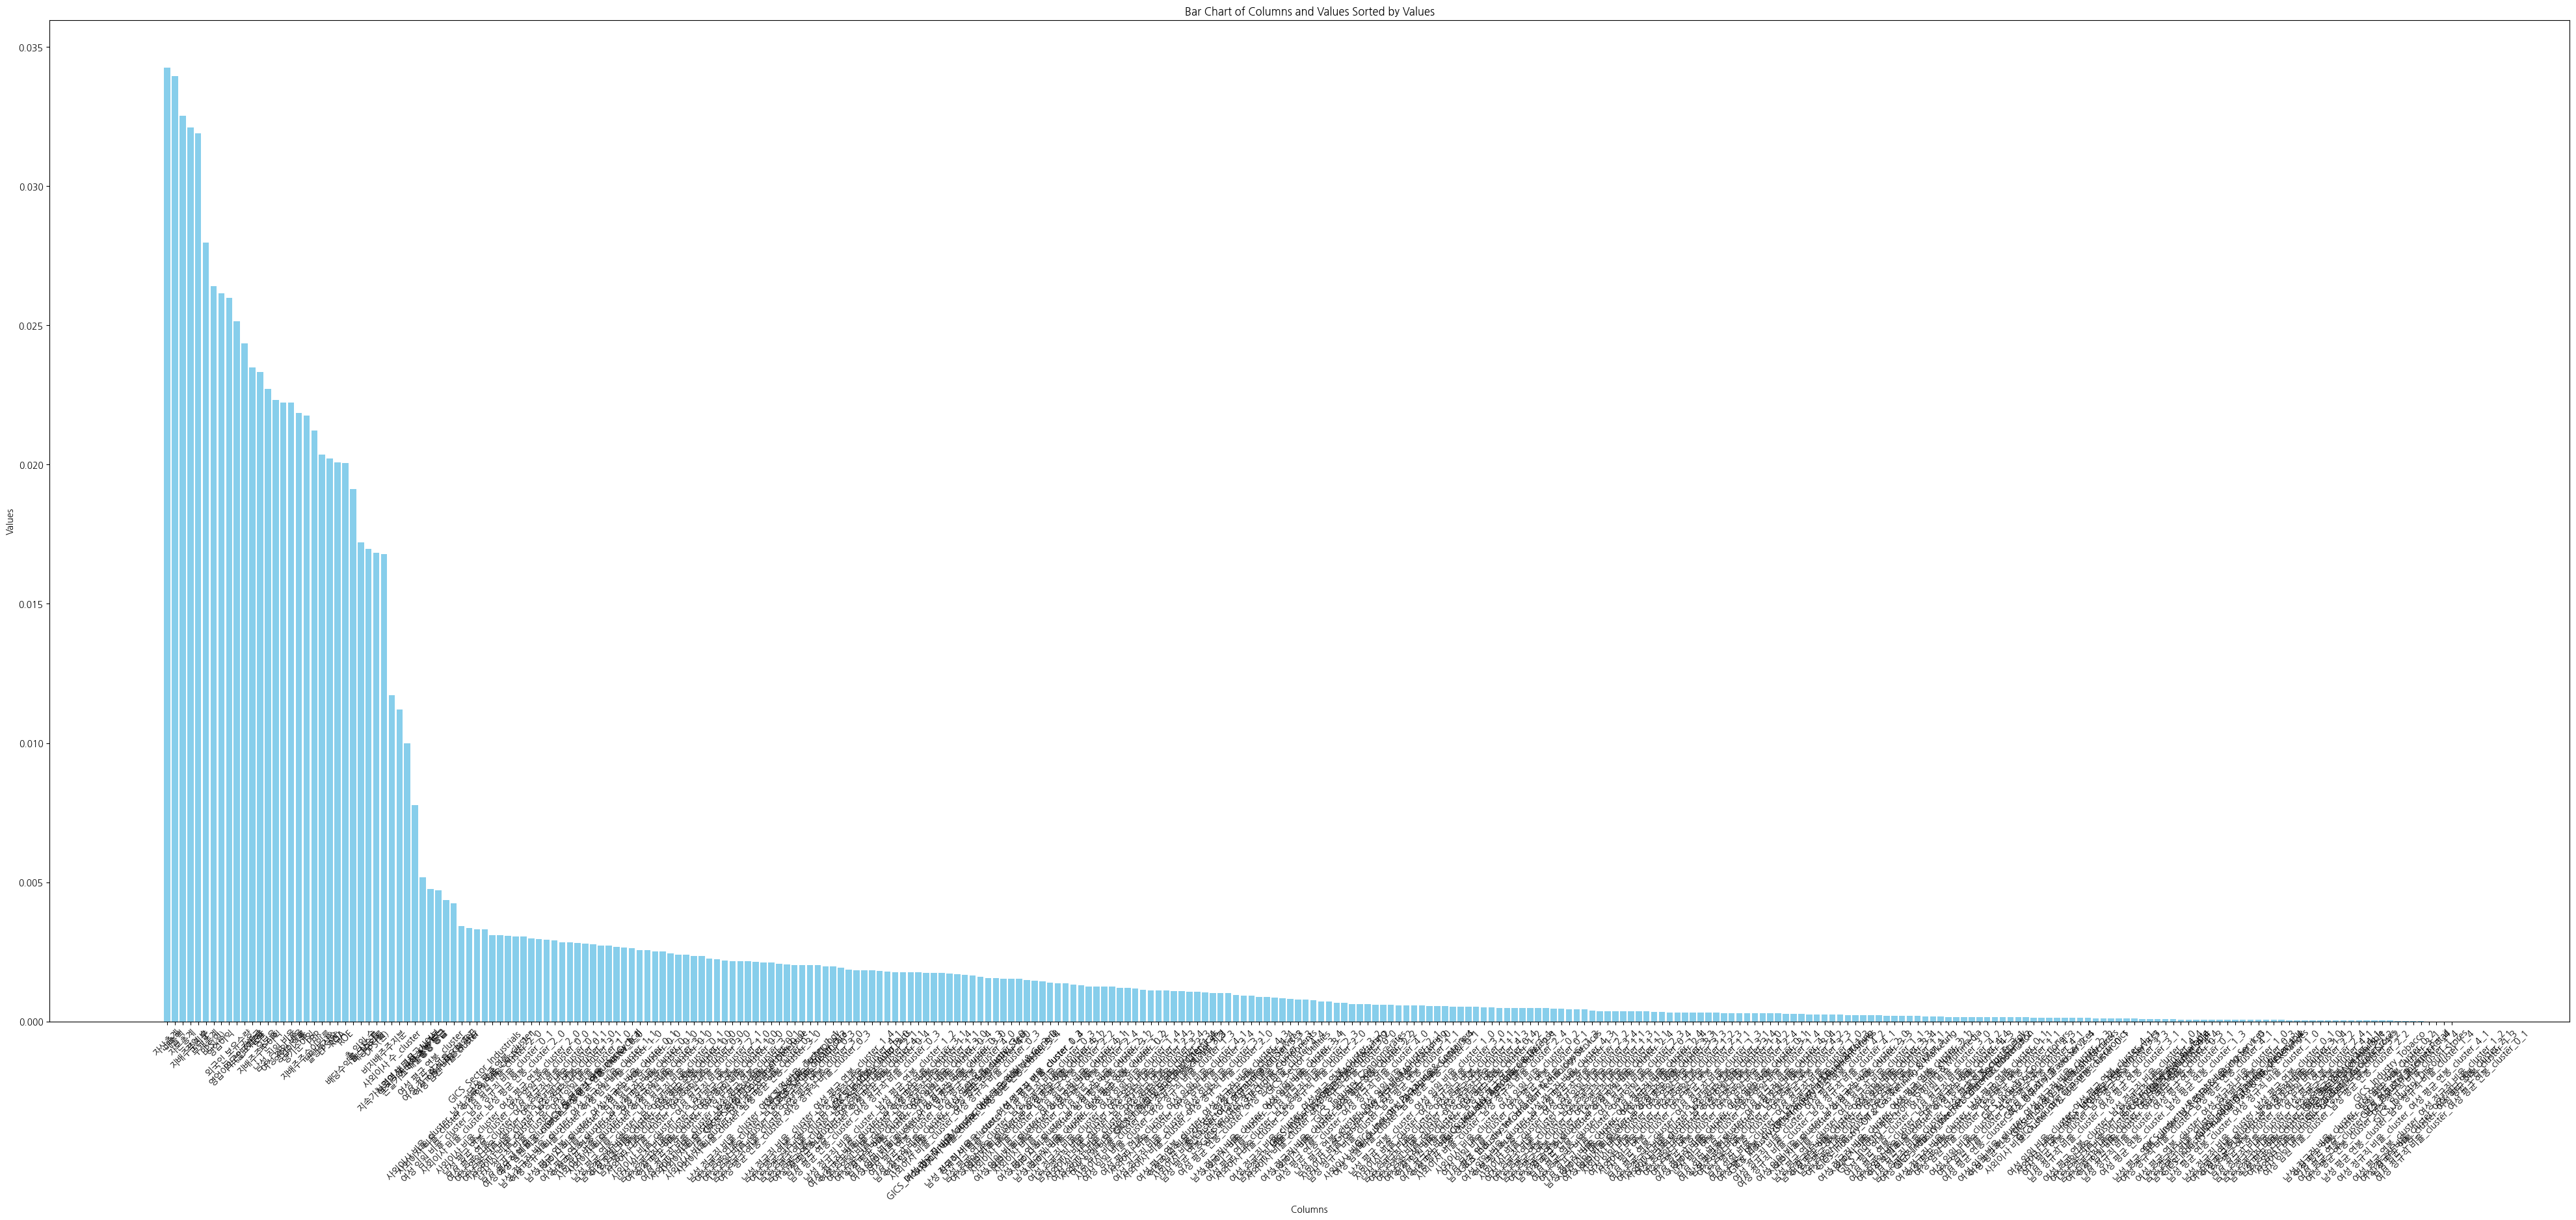

In [76]:
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'Columns': X_train_cat.columns.tolist(),
    'Values': lst_feature_importances[0]
})

# 값에 따라 정렬
df_sorted = df.sort_values(by='Values', ascending=False)

# 정렬된 값을 리스트로 변환
sorted_columns = df_sorted['Columns'].tolist()
sorted_values = df_sorted['Values'].tolist()

# 막대 그래프 그리기
plt.figure(figsize=(50, 20))
plt.bar(sorted_columns, sorted_values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Bar Chart of Columns and Values Sorted by Values')
plt.xticks(rotation=45)
plt.show()

In [77]:
df_sorted

,Columns,Values
0,자산총계,3.426138e-02
2,매출액,3.395900e-02
8,자본총계,3.253962e-02
9,지배주주지분,3.210726e-02
70,직원 수,3.189251e-02
7,부채총계,2.798668e-02
18,BPS(원),2.640929e-02
3,영업이익,2.616342e-02
25,외국인 보유수량,2.600026e-02
4,영업이익(발표기준),2.516078e-02


## 종합등급 컬럼을 4단계로

In [ ]:
df2 = df.copy()
df2.tail()

In [ ]:
def convert_grade2(grade):
    if grade in ['A+']:
        return 3
    if grade in ['A']:
        return 2
    if grade in ['B+']:
        return 1
    if grade in ['B','C','.C','D']:
        return 0

# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df2['종합등급'] = df2['종합등급'].apply(lambda x: convert_grade2(x))

In [ ]:
df2.tail()

### ANOVA 분석

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# 수치형데이터 컬럼과 종합등급 컬럼이 들어간 새로운 df생성
df2_numeric = df2[numeric_cols]
df2_numeric['종합등급'] = df2['종합등급']

# 종합등급의 각 수준에 따른 수치형 변수들의 데이터 프레임 생성
grade_groups = {}
for grade in df2_numeric['종합등급'].unique():
    grade_groups[grade] = df2_numeric[df2_numeric['종합등급'] == grade]

# ANOVA 분석 수행 및 P-value 값이 0.05 이상인 컬럼 제거
anova_results = {}
drop_col2 = []
for col in numeric_cols:
    data = [grade_groups[grade][col] for grade in df2_numeric['종합등급'].unique()]
    f_statistic, p_value = f_oneway(*data)
    anova_results[col] = {'F-statistic': f_statistic, 'P-value': p_value}

    # P-value 값이 0.05 이하인 컬럼만 추출
    if p_value > 0.05:
        drop_col2.append(col)

# 결과 출력
for col, result in anova_results.items():
    print(f"ANOVA results for '{col}':")
    print("F-statistic:", result['F-statistic'])
    print("P-value:", result['P-value'])
    print()

# df1_numeric에서 drop_col2에 있는 컬럼들을 제외하고 가져오기
df2 = df2.drop(drop_col2, axis=1)

# 결과 확인
print(df2.columns)

In [ ]:
df2.head()

### 카이제곱 검정

In [ ]:
# '종합등급' 컬럼과 카이제곱 검정
import pandas as pd
from scipy.stats import chi2_contingency

# 범주형 컬럼으로 df 생성
df2_non_numeric = df2[non_numeric_cols]

# index, 회사명_y 컬럼 제외
df2_non_numeric = df2_non_numeric.drop(columns=['index', '회사명'])


# '종합등급' 컬럼과 카이제곱 검정 수행
chi2_results = {}
for col in df2_non_numeric.columns:
    if col != '종합등급':
        contingency_table = pd.crosstab(df2_non_numeric[col], df['종합등급'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results[col] = {'Chi2-statistic': chi2, 'P-value': p_value}

# 결과 출력
for col, result in chi2_results.items():
    print(f"Chi-squared test results for '{col}' with '종합등급':")
    print("Chi2-statistic:", result['Chi2-statistic'])
    print("P-value:", result['P-value'])
    print()

# P-value 값이 0.05 이상인 컬럼만 추출
significant_columns = [col for col, result in chi2_results.items() if result['P-value'] > 0.05]

# 결과 출력
print("Significant columns:", significant_columns)

# df에서 significant_columns 컬럼들 제거
df2 = df2.drop(columns=significant_columns)

# df에서 회사명 컬럼 제거
df2 = df2.drop(columns=['회사명'])

In [ ]:
df2.columns.tolist()

In [ ]:
# 종합등급 컬럼을 test data로
train_data = df2[df2['index'] <= '2021-12-31']
test_data =  df2[df2['index'] > '2021-12-31']

In [ ]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [ ]:
df2_concat=train_data.copy()

In [ ]:
columns_list = df2_concat.columns[2:].tolist()

In [ ]:
len(columns_list)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(train_data[columns_list],train_data['종합등급'])

# train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [ ]:
!pip install catboost

In [ ]:
train_data

In [ ]:
# train_data와 test_data에서 X와 y를 설정합니다.
X_train_cat = train_data[columns_list].astype(float)
y_train_cat = train_data['종합등급'].astype(int)

X_test_cat = test_data[columns_list].astype(float)
y_test_cat = test_data['종합등급'].astype(int)

#### 모델 생성 및 평가

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

models = {
  #  "Logistic Regression": LogisticRegression(max_iter=2000, random_state=41),

  "Random Forest Classifier": RandomForestClassifier(random_state=41),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=41),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=41),
    "Decision Tree Classifer": DecisionTreeClassifier(random_state=41),
    "Bagging": BaggingClassifier(random_state=41),
    "extraTreesClassifier":ExtraTreesClassifier(bootstrap = False, max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split =4, n_estimators= 200, random_state= 0),
    "hist":HistGradientBoostingClassifier(random_state=41),
   # "svr":SVR(),
    "XGBClassifier Classifier": xgb.XGBClassifier(seed=41),
    'LGBM':LGBMClassifier(bootstrap= True, max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state= 0,verbose=0),
    'catbost':CatBoostClassifier(random_state=41,verbose=0),
}
lst_feature_importances = []

# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    model.fit(X_train_cat, y_train_cat)
    y_pred = model.predict(X_test_cat)

    if hasattr(model, 'feature_importances_'):
        lst_feature_importances.append(model.feature_importances_)
    else:
        lst_feature_importances.append(None)  # 예외 처리: 해당 모델에 feature_importances_ 속성이 없으면 None 추가

    accuracy = accuracy_score(y_test_cat, y_pred)
    f1_scores = f1_score(y_test_cat, y_pred, average='macro')
    recall_scores = recall_score(y_test_cat, y_pred, average='macro')

    # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {} f1score:{} recall{}".format(name, accuracy, f1_scores, recall_scores))


## 모델나눔

In [ ]:
# k 값 범위 설정
k_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120 ,130 ,140 ,150, 151]
# k_values = list(range(10, 152))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

### RandomForestClassifier

In [ ]:
# RandomForestClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_rf = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', RandomForestClassifier(random_state=41))
])


# RandomForestClassifier에 대한 그리드 서치
param_grid_rf = {
    'selector__k': k_values
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=10)
grid_search_rf.fit(X_train_cat, y_train_cat)

# 최적의 k 값 출력
print("Best k for RandomForestClassifier:", grid_search_rf.best_params_['selector__k'])

# 최적의 k 값을 사용하여 특성 선택을 적용
X_train_selected_rf = grid_search_rf.best_estimator_.named_steps['selector'].transform(X_train_cat)
X_test_selected_rf = grid_search_rf.best_estimator_.named_steps['selector'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
rf_model = RandomForestClassifier(random_state=41)
rf_model.fit(X_train_selected_rf, y_train_cat)
y_pred_rf = rf_model.predict(X_test_selected_rf)

accuracy_rf = accuracy_score(y_test_cat, y_pred_rf)
f1_rf = f1_score(y_test_cat, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_cat, y_pred_rf, average='macro')

print(f"RandomForestClassifier - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}, Recall: {recall_rf}")

### GradientBoostingClassifier

In [ ]:
# GBC
from sklearn.ensemble import GradientBoostingClassifier


# GradientBoostingClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_gb = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', GradientBoostingClassifier(random_state=41))
])

# GradientBoostingClassifier에 대한 그리드 서치
param_grid_gb = {
    'selector__k': k_values
}

grid_search_gb = GridSearchCV(pipeline_gb, param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train_cat, y_train_cat)

# 최적의 k 값 출력
print("Best k for GradientBoostingClassifier:", grid_search_gb.best_params_['selector__k'])

# 최적의 k 값을 사용하여 특성 선택을 적용
X_train_selected_gb = grid_search_gb.best_estimator_.named_steps['selector'].transform(X_train_cat)
X_test_selected_gb = grid_search_gb.best_estimator_.named_steps['selector'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
gb_model = GradientBoostingClassifier(random_state=41)
gb_model.fit(X_train_selected_gb, y_train_cat)
y_pred_gb = gb_model.predict(X_test_selected_gb)

accuracy_gb = accuracy_score(y_test_cat, y_pred_gb)
f1_gb = f1_score(y_test_cat, y_pred_gb, average='macro')
recall_gb = recall_score(y_test_cat, y_pred_gb, average='macro')

print(f"GradientBoostingClassifier - Accuracy: {accuracy_gb}, F1 Score: {f1_gb}, Recall: {recall_gb}")

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# ExtraTreesClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_et = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', ExtraTreesClassifier(random_state=41))
])

# ExtraTreesClassifier에 대한 그리드 서치
param_grid_et = {
    'selector__k': k_values
}

grid_search_et = GridSearchCV(pipeline_et, param_grid=param_grid_et, cv=5)
grid_search_et.fit(X_train_cat, y_train_cat)

# 최적의 k 값 출력
print("Best k for ExtraTreesClassifier:", grid_search_et.best_params_['selector__k'])

# 최적의 k 값을 사용하여 특성 선택을 적용
X_train_selected_et = grid_search_et.best_estimator_.named_steps['selector'].transform(X_train_cat)
X_test_selected_et = grid_search_et.best_estimator_.named_steps['selector'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
et_model = ExtraTreesClassifier(random_state=41)
et_model.fit(X_train_selected_et, y_train_cat)
y_pred_et = et_model.predict(X_test_selected_et)

accuracy_et = accuracy_score(y_test_cat, y_pred_et)
f1_et = f1_score(y_test_cat, y_pred_et, average='macro')
recall_et = recall_score(y_test_cat, y_pred_et, average='macro')

print(f"ExtraTreesClassifier - Accuracy: {accuracy_et}, F1 Score: {f1_et}, Recall: {recall_et}")

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

# XGBClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_xgb = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', XGBClassifier(random_state=41))
])


# XGBClassifier에 대한 그리드 서치
param_grid_xgb = {
    'selector__k': k_values
}

grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_cat, y_train_cat)

# 최적의 k 값 출력
print("Best k for XGBClassifier:", grid_search_xgb.best_params_['selector__k'])

# 최적의 k 값을 사용하여 특성 선택을 적용
X_train_selected_xgb = grid_search_xgb.best_estimator_.named_steps['selector'].transform(X_train_cat)
X_test_selected_xgb = grid_search_xgb.best_estimator_.named_steps['selector'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
xgb_model = XGBClassifier(random_state=41)
xgb_model.fit(X_train_selected_xgb, y_train_cat)
y_pred_xgb = xgb_model.predict(X_test_selected_xgb)

accuracy_xgb = accuracy_score(y_test_cat, y_pred_xgb)
f1_xgb = f1_score(y_test_cat, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test_cat, y_pred_xgb, average='macro')

print(f"XGBClassifier - Accuracy: {accuracy_xgb}, F1 Score: {f1_xgb}, Recall: {recall_xgb}")

### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier


# LGBMClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_lgbm = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', LGBMClassifier(random_state=41))
])

# LGBMClassifier에 대한 그리드 서치
param_grid_lgbm = {
    'selector__k': k_values
}

grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid=param_grid_lgbm, cv=5)
grid_search_lgbm.fit(X_train_cat, y_train_cat)

# 최적의 k 값 출력
print("Best k for LGBMClassifier:", grid_search_lgbm.best_params_['selector__k'])

# 최적의 k 값을 사용하여 특성 선택을 적용
X_train_selected_lgbm = grid_search_lgbm.best_estimator_.named_steps['selector'].transform(X_train_cat)
X_test_selected_lgbm = grid_search_lgbm.best_estimator_.named_steps['selector'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
lgbm_model = LGBMClassifier(random_state=41,
                            num_leaves=grid_search_lgbm.best_params_['classifier__num_leaves'],
                            learning_rate=grid_search_lgbm.best_params_['classifier__learning_rate'],
                            min_child_samples=grid_search_lgbm.best_params_['classifier__min_child_samples'])
lgbm_model.fit(X_train_selected_lgbm, y_train_cat)
y_pred_lgbm = lgbm_model.predict(X_test_selected_lgbm)

accuracy_lgbm = accuracy_score(y_test_cat, y_pred_lgbm)
f1_lgbm = f1_score(y_test_cat, y_pred_lgbm, average='macro')
recall_lgbm = recall_score(y_test_cat, y_pred_lgbm, average='macro')

print(f"LGBMClassifier - Accuracy: {accuracy_lgbm}, F1 Score: {f1_lgbm}, Recall: {recall_lgbm}")

#### SelectFromModel

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, recall_score

# LGBMClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_lgbm = Pipeline([
    ('feature_selection', SelectFromModel(LGBMClassifier(random_state=41))),
    ('classifier', LGBMClassifier(random_state=41))
])

# LGBMClassifier에 대한 그리드 서치
param_grid_lgbm = {
    'feature_selection__threshold': ['mean', 'median', '1.25*mean'],
    'classifier__num_leaves': [15, 31, 50],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__min_child_samples': [20, 30, 50]
}

grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid=param_grid_lgbm, cv=5)
grid_search_lgbm.fit(X_train_cat, y_train_cat)

# 최적의 파라미터 출력
print("Best parameters for LGBMClassifier:", grid_search_lgbm.best_params_)

# 최적의 파라미터를 사용하여 특성 선택을 적용
X_train_selected_lgbm = grid_search_lgbm.best_estimator_.named_steps['feature_selection'].transform(X_train_cat)
X_test_selected_lgbm = grid_search_lgbm.best_estimator_.named_steps['feature_selection'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
lgbm_model = LGBMClassifier(random_state=41,
                            num_leaves=grid_search_lgbm.best_params_['classifier__num_leaves'],
                            learning_rate=grid_search_lgbm.best_params_['classifier__learning_rate'],
                            min_child_samples=grid_search_lgbm.best_params_['classifier__min_child_samples'])
lgbm_model.fit(X_train_selected_lgbm, y_train_cat)
y_pred_lgbm = lgbm_model.predict(X_test_selected_lgbm)

accuracy_lgbm = accuracy_score(y_test_cat, y_pred_lgbm)
f1_lgbm = f1_score(y_test_cat, y_pred_lgbm, average='macro')
recall_lgbm = recall_score(y_test_cat, y_pred_lgbm, average='macro')

print(f"LGBMClassifier - Accuracy: {accuracy_lgbm}, F1 Score: {f1_lgbm}, Recall: {recall_lgbm}")

### CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier


# CatBoostClassifier에 대한 그리드 서치를 위한 파이프라인 설정
pipeline_catboost = Pipeline([
    ('selector', SelectKBest(score_func=chi2)),
    ('classifier', CatBoostClassifier(random_state=41, verbose=0))
])

# CatBoostClassifier에 대한 그리드 서치
param_grid_catboost = {
    'selector__k': k_values
}

grid_search_catboost = GridSearchCV(pipeline_catboost, param_grid=param_grid_catboost, cv=5)
grid_search_catboost.fit(X_train_cat, y_train_cat)

# 최적의 k 값 출력
print("Best k for CatBoostClassifier:", grid_search_catboost.best_params_['selector__k'])

# 최적의 k 값을 사용하여 특성 선택을 적용
X_train_selected_catboost = grid_search_catboost.best_estimator_.named_steps['selector'].transform(X_train_cat)
X_test_selected_catboost = grid_search_catboost.best_estimator_.named_steps['selector'].transform(X_test_cat)

# 최적의 모델 학습 및 평가
catboost_model = CatBoostClassifier(random_state=41, verbose=0)
catboost_model.fit(X_train_selected_catboost, y_train_cat)
y_pred_catboost = catboost_model.predict(X_test_selected_catboost)

accuracy_catboost = accuracy_score(y_test_cat, y_pred_catboost)
f1_catboost = f1_score(y_test_cat, y_pred_catboost, average='macro')
recall_catboost = recall_score(y_test_cat, y_pred_catboost, average='macro')

print(f"CatBoostClassifier - Accuracy: {accuracy_catboost}, F1 Score: {f1_catboost}, Recall: {recall_catboost}")